In [1]:
# TODO 
# for reprociblity set random seed -- it should be the last two digits of your student ID

### Tabular Modality: Exploring Multi-Omics Data with MLOmics

#### Objective

In this homework, we will explore **MLOmics**, a benchmark framework
providing curated and preprocessed cancer multi-omics datasets ready for
machine learning application.

You will gain hands-on experience with: 
- Understanding how biomedical
datasets are curated and made ML-ready.
- Loading and exploring multi-omics data modalities.
- Training machine learning models for **cancer type classification**
using single-omics and fused multi-omics data.
- Evaluating the trade-offs between early fusion of data modalities and
using them individually.


#### Deliverables

-   A **clean Jupyter Notebook** with:
    -   Code cells (organized with headers), create cells whenever needed. 
    -   Outputs (EDA figures, evaluation reports, confusion matrices).
    -   Written answers to all reflection/discussion questions, create cells whenver needed (in markdown cells). 

### First step

Clone the repository and install dependencies, follow the guidlines in the link below: 

https://github.com/chenzRG/Cancer-Multi-Omics-Benchmark



### Understanding the Data (Total 25)

Before running experiments, let's reflect on how **MLOmics** was
constructed.


#### Answer These Questions

Please refer to the
[paper](https://www.nature.com/articles/s41597-025-05235-x):

1.  **Main Challenge**: What is the key problem MLOmics addresses in
    biomedical ML research? (5 pts)

The key problem MLOmics addresses in biomedical ML research is the lack of standardized machine learning-ready multi-omics datasets. The datasets obtained from TCGA require extensive preprocessing, metadata linking, and cleaning before use making it difficult to train ML models because of increase in complexity and inconsistency, MLOmics solves this by providing a unified, well-processed, and benchmarked multi-omics database that can be used for directly building machine learning models.

2.  **Solution Strategy**: Summarize the process the authors used to
    prepare TCGA multi-omics data for ML. (10 pts)

The process the authors used to prepare TCGA multi-omics data from ML include the following steps:
1. Data collection: They retrieved data from TCGA through GDC portal across 32 cancer types (8314 patient samples) and mainly includes data about four omics modalities such as mRNA expression, miRNA expression, DNA methylation, and copy number variation.
2. Metadata filtering: For each modality they filtered based on the experimental strategy, data category, and platform to ensure uniformity.
3. Data preprocessing and cleaning: They converted the gene-level estimates such as RSEM to FPKM values, removed non-human miRNAs, dropped features that had zero expression in samples or missing values, and performed data transformations.
4. Feature alignment and integration across modalities: They aligned the sample IDs across all four omics types so that each patient has data points in each modality. They also built multi-omics tables at three feature scales such as Original, Aligned, and Top for consistent ML input.
5. Benchmark dataset creation and baseline modeling: They combined the cleaned and aligned multi-omics tables into ML-ready classification, clustering, and imputation tasks, reproduced multiple baseline models to evaluate their performance on the datasets and provided feature models for training.


3.  **Generalization**: If you wanted to prepare biomedical datasets for
    ML yourself, what key preprocessing and curation steps would be
    necessary? (10 pts)

The key preprocessing and curation steps that would be necessary to prepare biomedical datasets for ML include the following steps:
1. Data collection: The data can be gathered from reliable sources such as TCGA and clinical records ensuring consistent samples IDs across all modalities. The metadata should be verified while excluding samples and attributes with missing values.
2. Data cleaning: The samples with large number of missing values and the attributes with less variance can be removed or imputed to use only important features to train the model.
3. Data normalization and transformation: Different normalization techniques can be applied to the datasets depending on their modality type and the features can be standardized to have zero mean and unit variance.
4. Alignment across modalities: The sample IDs can be merged across all datasets so that this ID is associated with the same patient across all modalities. The features such as genes and probes can be aligned using consistent gene symbols or genomic coordinates.
5. Dimensionality reduction: Dimensionality reduction methods such as PCA can be applied to select only the top n components which can explain the highest variance in the data.
6. Label encoding: The sample IDs can be mapped to labels such as disease type and outcome by encoding the categorical labels numerically and handling the class imbalance.
7. Dataset preparation: The dataset can be split into train, validation, and test components to be stored as CSV files to train the models.

### Exploring Pan-Cancer Data

We will use the **Pan-Cancer classification dataset** for this homework.
This dataset integrates four modalities:
- **mRNA** (gene expression)
- **miRNA** (microRNA expression)
- **CNV** (copy number variation)
- **DNA methylation**

In [3]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# TODO  
cancer = "D:\\Anjana\\MS\\Big Data Science\\Cancer-Multi-Omics-Benchmark\\MLOmics\Main_Dataset\\Classification_datasets\\Pan-cancer\\Original\\Pan-cancer"
# path should be something like this: 'MLOmics/Cancer-Multi-Omics-Benchmark/Baseline_and_Metric/Main_Dataset/Classification_datasets/Pan-cancer/Original/Pan-cancer'

omics_file_1 = pd.read_csv(f'{cancer}_mRNA.csv', index_col=0)  # mRNA data
omics_file_2 = pd.read_csv(f'{cancer}_miRNA.csv', index_col=0)  # miRNA data
omics_file_3 = pd.read_csv(f'{cancer}_CNV.csv', index_col=0)  # CNV data
omics_file_4 = pd.read_csv(f'{cancer}_Methy.csv', index_col=0)  # Methylation data
labels = pd.read_csv(f'{cancer}_label_num.csv', header=0)
labels = labels.squeeze()  # Convert to 1D array

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Anjana\AppData\Local\Temp\ipykernel_29936\243129143.py:2: SyntaxWarning: invalid escape sequence '\M'
  cancer = "D:\\Anjana\\MS\\Big Data Science\\Cancer-Multi-Omics-Benchmark\\MLOmics\Main_Dataset\\Classification_datasets\\Pan-cancer\\Original\\Pan-cancer"


In [7]:
omics_data_1 = omics_file_1.T  # mRNA
omics_data_2 = omics_file_2.T  # miRNA
omics_data_3 = omics_file_3.T  # CNV
omics_data_4 = omics_file_4.T  # Methylation

omics_data_1 = omics_data_1.add_suffix('_mRNA')
omics_data_2 = omics_data_2.add_suffix('_miRNA')
omics_data_3 = omics_data_3.add_suffix('_CNV')
omics_data_4 = omics_data_4.add_suffix('_Methy')

In [9]:
labels.index = omics_data_1.index

#### Studying Data (Total 20 pts)

**Tasks:** 

1. Display samples from each omics dataset (first few rows).

In [11]:
print("mRNA Data:")
display(omics_data_1.head())

print("\n miRNA Data:")
display(omics_data_2.head())

print("\n CNV Data:")
display(omics_data_3.head())

print("\n DNA Methylation Data:")
display(omics_data_4.head())

print("\n Labels:")
display(labels.head())

mRNA Data:


sample,KRT5_mRNA,KRT6A_mRNA,CEACAM5_mRNA,KRT14_mRNA,RPS4Y1_mRNA,XIST_mRNA,AGR2_mRNA,CEACAM6_mRNA,KRT6B_mRNA,SLC34A2_mRNA,...,TMED7-TICAM2_mRNA,ABCB4_mRNA,ALPL_mRNA,MPP2_mRNA,C6orf218_mRNA,WBSCR26_mRNA,LRRC50_mRNA,NFE2_mRNA,FCRL2_mRNA,SLC29A4_mRNA
TCGA-IB-AAUW-01,0.565732,-0.122688,0.948782,0.080169,-1.171622,1.117388,1.083256,1.423004,0.247347,0.914985,...,-0.051795,0.596454,0.011393,0.510549,-0.357820,0.793199,0.702303,0.427440,1.349475,0.930020
TCGA-AJ-A3EJ-01,-0.063888,-0.114109,-0.845083,-0.316703,-1.171622,0.695777,0.718073,-0.898649,-0.277886,1.441762,...,-0.690927,-0.420822,2.109586,0.560111,0.088933,-0.047777,0.813229,1.455827,-0.573520,0.210512
TCGA-EE-A29D-06,-1.154331,-0.687172,-0.989103,-0.578278,0.877307,-0.759052,-1.353780,-1.159127,-0.828130,-1.196040,...,0.641730,-0.183308,-1.262344,1.051220,4.165555,0.765775,-1.243519,-0.809283,0.330110,0.308830
TCGA-55-7725-01,-0.519646,-0.635699,1.333442,0.008010,-1.171622,1.381573,1.062761,1.526818,-0.618422,1.956789,...,0.038862,-0.246048,0.428253,-1.129486,-0.097214,0.710929,0.401880,0.790922,1.638815,-1.501113
TCGA-AO-A0JJ-01,0.653508,-0.294263,1.050872,0.915403,-1.171622,0.987105,1.293795,1.255015,0.214640,0.417582,...,0.424154,0.022836,0.085502,-0.160784,-0.376435,0.002499,-0.480904,-0.552186,0.663963,0.125601



 miRNA Data:


sample,hsa-miR-205-5p_miRNA,hsa-miR-375_miRNA,hsa-miR-200c-3p_miRNA,hsa-miR-141-3p_miRNA,hsa-miR-1269a_miRNA,hsa-miR-9-5p_miRNA,hsa-miR-141-5p_miRNA,hsa-miR-203a_miRNA,hsa-miR-196a-5p_miRNA,hsa-miR-196b-5p_miRNA,...,hsa-miR-4661-5p_miRNA,hsa-miR-320b_miRNA,hsa-miR-3677-3p_miRNA,hsa-miR-7702_miRNA,hsa-miR-497-5p_miRNA,hsa-miR-30c-5p_miRNA,hsa-miR-296-3p_miRNA,hsa-miR-3687_miRNA,hsa-miR-19b-1-5p_miRNA,hsa-miR-425-3p_miRNA
TCGA-IB-AAUW-01,0.384463,1.314672,1.240129,0.977988,0.190938,-0.671298,0.740016,0.890932,-1.336092,-1.396753,...,-1.140213,-0.966642,-1.476295,-0.057385,1.144788,0.418051,-0.656596,-0.926613,-0.148995,0.295813
TCGA-AJ-A3EJ-01,0.854965,0.004291,0.307802,0.435951,1.922844,0.677738,0.394449,-0.627762,-0.513146,1.493826,...,-0.494086,2.532936,-0.236334,-0.550537,-0.444171,-0.886182,1.240547,0.697984,-0.561395,0.377673
TCGA-EE-A29D-06,-1.244939,-1.168277,-1.524444,-1.870978,1.997151,1.444358,-1.662880,-0.077794,1.615377,0.697638,...,1.143983,2.875487,0.344627,-0.102217,-0.635193,-0.419767,0.645920,-0.076658,-0.653040,0.004753
TCGA-55-7725-01,0.126073,1.020362,0.741558,0.708279,-0.837918,-0.920517,0.868599,-0.287173,-1.119527,-1.284839,...,-0.739796,-1.151805,-1.285531,-0.138083,0.615135,-0.713436,0.419396,-0.485497,-0.827165,-0.304497
TCGA-AO-A0JJ-01,0.448096,1.158173,0.355166,0.433332,-0.837918,-1.001785,0.665010,-0.242505,0.090142,-0.328773,...,-1.267618,-1.114772,-1.146794,-0.828495,-0.088175,-0.618425,-0.958629,-0.539292,-1.312881,-0.741086



 CNV Data:


Sample,EGFR_CNV,CCND1_CNV,ORAOV1_CNV,SNORA73|ENSG00000252054.1_CNV,FGF19_CNV,ANO1_CNV,PPFIA1_CNV,FGF4_CNV,FGF3_CNV,MIR548K_CNV,...,PTCD1_CNV,WDR64_CNV,OR2G2_CNV,KIAA1432_CNV,MIR4737_CNV,GNG11_CNV,MYOM2_CNV,ZNF383_CNV,C11orf30_CNV,OR2G3_CNV
TCGA-IB-AAUW-01,-0.407662,-0.244089,-0.244330,-0.411146,-0.241204,-0.230246,-0.226359,-0.239893,-0.238489,-0.225766,...,-0.414035,-0.441685,-0.445107,0.156772,-0.279358,-0.418204,0.265268,-0.147091,-0.049587,-0.444747
TCGA-AJ-A3EJ-01,-0.036677,-0.780234,-0.780794,-0.025439,-0.781814,-0.777325,-0.775447,-0.785790,-0.785039,-0.778843,...,0.109151,1.000091,1.241037,-0.578339,-0.328015,0.112131,1.128517,0.503987,-1.070625,1.241649
TCGA-EE-A29D-06,1.716913,-0.139983,-0.140162,1.797740,-0.136232,-0.127173,-0.122908,-0.133893,-0.132363,-0.121563,...,0.830299,0.939816,0.917240,-1.793282,0.280192,0.843132,0.821743,-0.436180,0.142783,0.917804
TCGA-55-7725-01,-0.409380,-0.249295,-0.249538,-0.412931,-0.246453,-0.238175,-0.234317,-0.245193,-0.243795,-0.233781,...,-0.416392,0.850609,0.840488,0.144953,-0.308552,-0.420593,0.305695,-0.187312,-0.064384,0.841040
TCGA-AO-A0JJ-01,-0.405945,-0.245391,-0.245632,-0.409360,-0.242516,-0.234211,-0.230338,-0.241218,-0.239816,-0.229774,...,-0.411679,0.758991,0.749345,0.159136,0.401834,-0.415815,0.293805,-0.222506,-0.056985,0.749884



 DNA Methylation Data:


sample,cg00211215_Methy,cg00123762_Methy,cg00092518_Methy,cg00011616_Methy,cg00177787_Methy,cg00074145_Methy,cg00217080_Methy,cg00103771_Methy,cg00084338_Methy,cg00150025_Methy,...,rs1467387_Methy,rs10936224_Methy,rs1040870_Methy,rs10882854_Methy,rs6471533_Methy,rs13369115_Methy,rs715359_Methy,rs264581_Methy,rs654498_Methy,rs10033147_Methy
TCGA-IB-AAUW-01,1.194575,-0.610787,-0.533258,-0.044237,0.231993,-0.835937,1.113290,-1.123591,-0.370943,-0.038462,...,-0.847770,-1.260926,-1.094409,0.854139,-0.371727,-0.598505,0.886844,0.525650,1.123292,0.962944
TCGA-AJ-A3EJ-01,-0.000646,-1.162419,-0.772606,-1.325539,-1.347083,-1.193534,0.849979,1.079214,-1.439925,-0.975871,...,-0.811964,1.540024,1.347582,-0.940943,-0.387600,1.002487,0.871779,-0.873449,-0.885321,0.545134
TCGA-EE-A29D-06,-0.761721,1.423110,-0.693426,1.355668,0.948315,1.603994,-1.858466,-1.529652,-1.271277,1.151645,...,1.139141,-1.246972,-0.926418,0.769871,-0.066029,0.930539,0.830456,-0.860308,-1.478428,0.478870
TCGA-55-7725-01,-0.000646,0.383680,-0.515768,0.958221,0.769988,0.828517,0.816809,0.003018,0.277849,-0.913512,...,0.633938,-0.028115,0.265999,-0.765514,0.998670,0.710594,0.735537,0.507524,0.800265,0.650437
TCGA-AO-A0JJ-01,0.562812,0.767089,-0.883323,-0.725195,0.932218,0.496503,-0.589421,0.003018,1.111086,-0.412092,...,-0.840863,1.435030,0.040164,-0.774445,-0.299242,-0.415058,-0.448004,-0.907209,-0.326252,-2.004687



 Labels:


TCGA-IB-AAUW-01    19
TCGA-AJ-A3EJ-01    29
TCGA-EE-A29D-06    24
TCGA-55-7725-01    15
TCGA-AO-A0JJ-01     2
Name: Label, dtype: int64

2. Explain what each omics modality represents: what do the rows and columns
mean?

The rows across all the omics modalities represent the patient's IDs. The columns in each modality represents the following values:
1. mRNA data: Genes such as TP53 and BRCA1 with expression values like FPKM or log2.
2. miRNA data: miRNAs such as hsa-miR-21 and hsa-miR-155 with normalized counts.
3. CNV data: Genomic regions or genes with copy number ratios.
4. DNA Methylation data: CpG sites or methylation probes with beta values (0 - 1 scale).

3. Compare modalities: From a **biological perspective**, what
distinct information do they capture?

The distinct information that each omics modality represents includes:
1. mRNA data: Represents how actively genes are transcribed into RNA.
2. miRNA data: Represents regulatory small RNAs that control mRNA expression.
3. CNV data: Represents structural DNA changes such as gene duplications or deletions.
4. DNA Methylation data: Represents epigenetic modifications affecting gene regulation.

4. From an **ML engineering perspective**: what are the
similarities/differences between between these omics modalities?

The similarities between these omics modalities are:
1. All the modalities contain numeric, continous-valued features.
2. All the modalities have large number of features requiring PCA to reduce the dimensionality.
3. All the modalities have the same index of patient's sample IDs enabling fusion of modalities for model training.
4. All the modalities need similar preprocessing methods to normalize and scale the feature values

The differences between the omics modalities are:
1. Each modality provides a different biological perspective for a patient's sample.
2. Each modality has a different scale: mRNA (continous and log-transformed  values), miRNA (continous values), CNV (integer values), and DNA Methylation (0 to 1 beta values).

5. Create a countplot for labels (e.g., to visualize class imbalance)

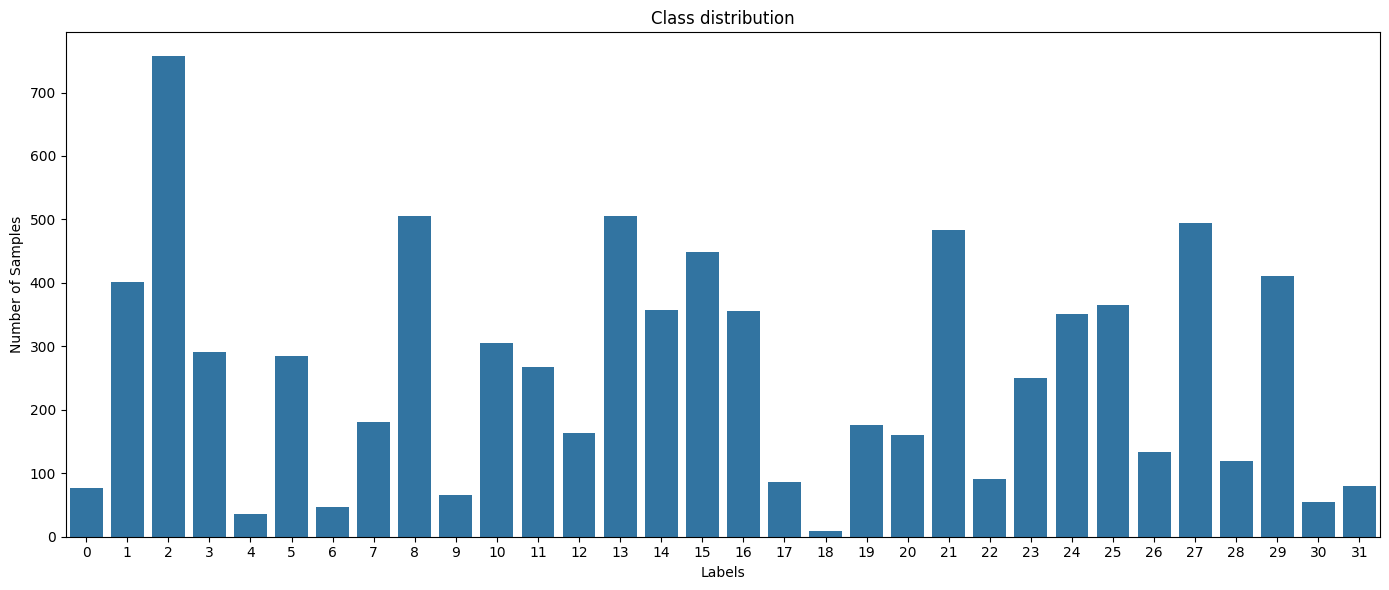

In [23]:
plt.figure(figsize = (14, 6))
sns.countplot(x = labels)

plt.title("Class distribution")
plt.xlabel("Labels")
plt.ylabel("Number of Samples")
plt.xticks()
plt.tight_layout()
plt.show()

### Classification Experiments (Total 40 pts)

We will conduct **stepwise experiments** to study the effect of early
fusion.

#### Experimental Design

1.  Train a classifier on each **single-omics dataset** (10 pts).
2.  Fuse two modalities (e.g., mRNA + CNV) **with an inner join (concatenate)** and train
    the same classifier (10 pts).
3.  Fuse three modalities (e.g., mRNA + CNV + Methylation) **with an inner join (concatenate)** and train the
    model (10 pts).
4.  Fuse **all four modalities** and train the model (10 pts).

#### Implementation Details

-   Train/test split: **80% training, 20% test**.
-   Optional: reserve **10% of training** as validation (for hyper-parameter tuning)
-   Models (choose any model from scikit-learn), such as: 
    -   Logistic Regression
    -   Random Forest
    -   SVM
    -   XGBoost

-   Evaluation:
    -  Classification_report
    -  Confusion matrix plot   

> If high dimensionality causes issues, apply **PCA** or any other dimenstionality reduction method before training. Please refer to this [link](https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c) to read more about dimentioality reduction methods.  

> Scale features appropriately depending on the model and data modality.


In [10]:
d = {"mRNA": omics_data_1, "miRNA": omics_data_2, "CNV": omics_data_3, "Methy": omics_data_4}

def fuse_modalities(ls):
    X = pd.concat([d[i] for i in ls], axis = 1, join = "inner")
    y = labels.loc[X.index]
    return X, y

def model_training_and_evaluation(X, y, modality):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components = 0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = XGBClassifier(n_estimators = 200, learning_rate = 0.05, max_depth = 6,
        objective = "multi:softmax", eval_metric = "mlogloss", tree_method = "hist",
        n_jobs = -1, random_state = 42)
    
    model.fit(X_train_pca, y_train)

    print(f"Evaulation metrics for {modality} modality:")
    y_pred = model.predict(X_test_pca)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
    plt.title(f"Confusion Matrix: {modality}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

Evaulation metrics for mRNA modality:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.91      0.93      0.92        80
           2       0.99      0.97      0.98       152
           3       0.91      0.86      0.88        58
           4       0.75      0.43      0.55         7
           5       0.80      0.91      0.85        57
           6       1.00      1.00      1.00         9
           7       0.70      0.44      0.54        36
           8       0.93      0.96      0.95       101
           9       0.92      0.85      0.88        13
          10       0.95      0.92      0.93        61
          11       0.94      0.94      0.94        54
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00       101
          14       0.96      0.97      0.97        72
          15       0.94      0.98      0.96        90
          16       0.88      0.92      0.90

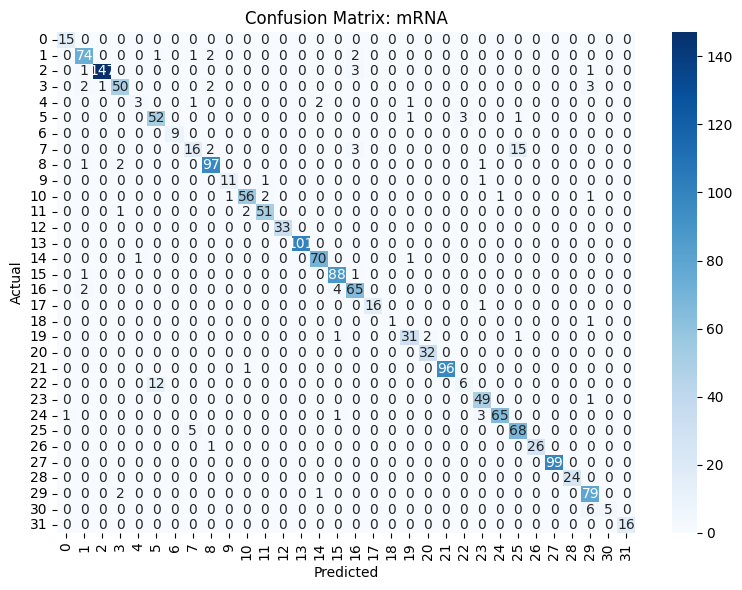

Evaulation metrics for miRNA modality:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.86      0.89        80
           2       0.95      0.97      0.96       152
           3       0.81      0.79      0.80        58
           4       0.83      0.71      0.77         7
           5       0.79      0.91      0.85        57
           6       1.00      0.89      0.94         9
           7       0.81      0.69      0.75        36
           8       0.87      0.89      0.88       101
           9       1.00      0.92      0.96        13
          10       0.95      0.93      0.94        61
          11       0.98      0.96      0.97        54
          12       1.00      0.97      0.98        33
          13       1.00      1.00      1.00       101
          14       0.99      0.97      0.98        72
          15       0.87      0.91      0.89        90
          16       0.78      0.86      0.8

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


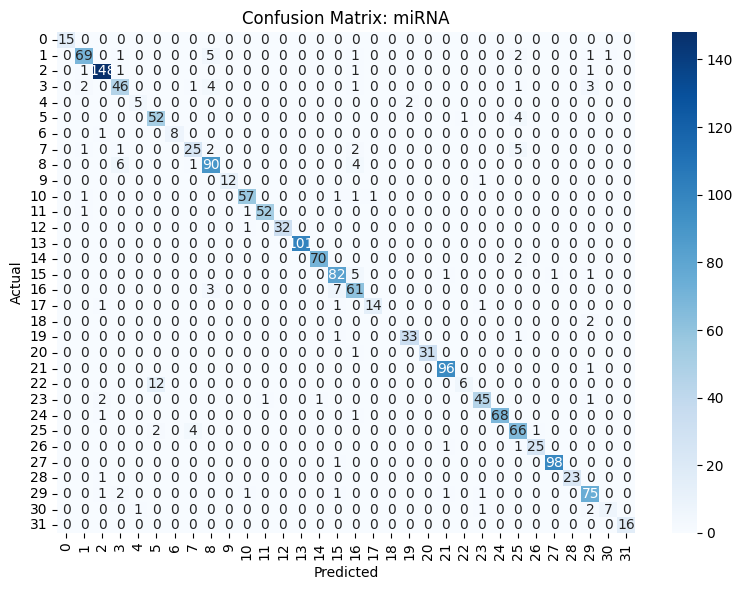

Evaulation metrics for CNV modality:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.38      0.36      0.37        80
           2       0.42      0.68      0.52       152
           3       0.52      0.43      0.47        58
           4       0.00      0.00      0.00         7
           5       0.54      0.51      0.52        57
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        36
           8       0.43      0.53      0.48       101
           9       0.85      0.85      0.85        13
          10       0.42      0.51      0.46        61
          11       0.78      0.52      0.62        54
          12       0.63      0.67      0.65        33
          13       0.61      0.77      0.68       101
          14       0.51      0.44      0.47        72
          15       0.39      0.41      0.40        90
          16       0.41      0.42      0.41 

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


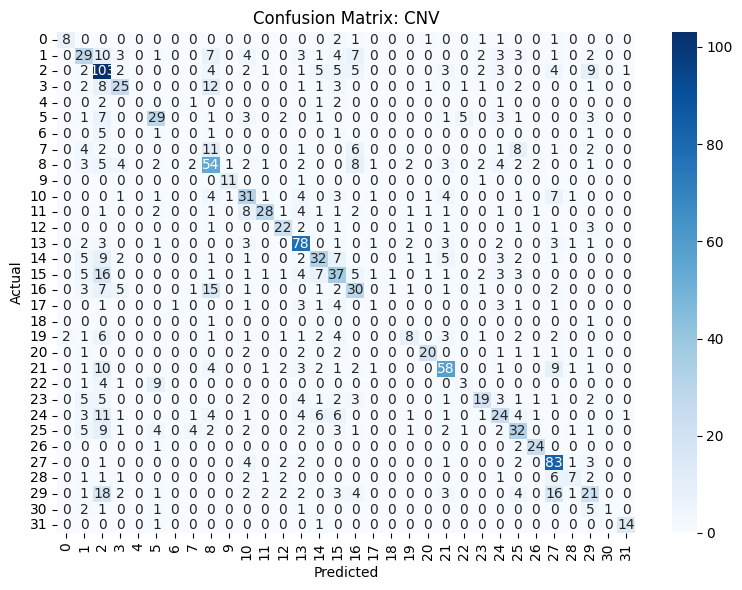

Evaulation metrics for Methy modality:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      0.84      0.91        80
           2       0.99      0.99      0.99       152
           3       0.88      0.91      0.90        58
           4       0.75      0.43      0.55         7
           5       0.75      0.88      0.81        57
           6       0.89      0.89      0.89         9
           7       0.73      0.31      0.43        36
           8       0.83      0.98      0.90       101
           9       0.92      0.92      0.92        13
          10       0.97      0.95      0.96        61
          11       0.98      0.98      0.98        54
          12       1.00      0.97      0.98        33
          13       1.00      1.00      1.00       101
          14       0.97      0.96      0.97        72
          15       0.92      0.97      0.94        90
          16       0.85      0.87      0.8

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


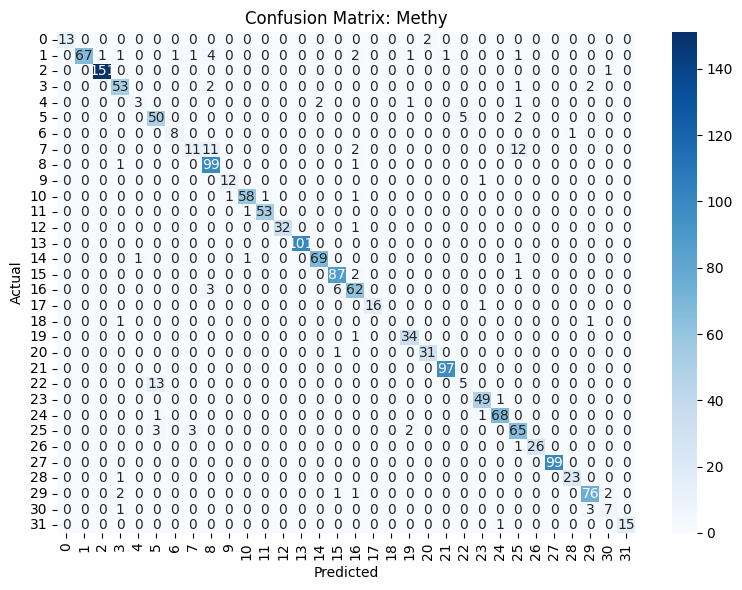

In [30]:
ls = ["mRNA", "miRNA", "CNV", "Methy"]

for i in ls:
    X, y = fuse_modalities([i])
    model_training_and_evaluation(X, y, i)

Evaulation metrics for ['mRNA', 'miRNA'] modality:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.95      0.93      0.94        80
           2       1.00      0.98      0.99       152
           3       0.93      0.90      0.91        58
           4       1.00      0.43      0.60         7
           5       0.74      0.91      0.82        57
           6       1.00      1.00      1.00         9
           7       0.78      0.50      0.61        36
           8       0.92      0.99      0.95       101
           9       0.92      0.85      0.88        13
          10       0.97      0.95      0.96        61
          11       0.96      0.96      0.96        54
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00       101
          14       0.96      1.00      0.98        72
          15       0.93      0.98      0.95        90
          16       0.93      0

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


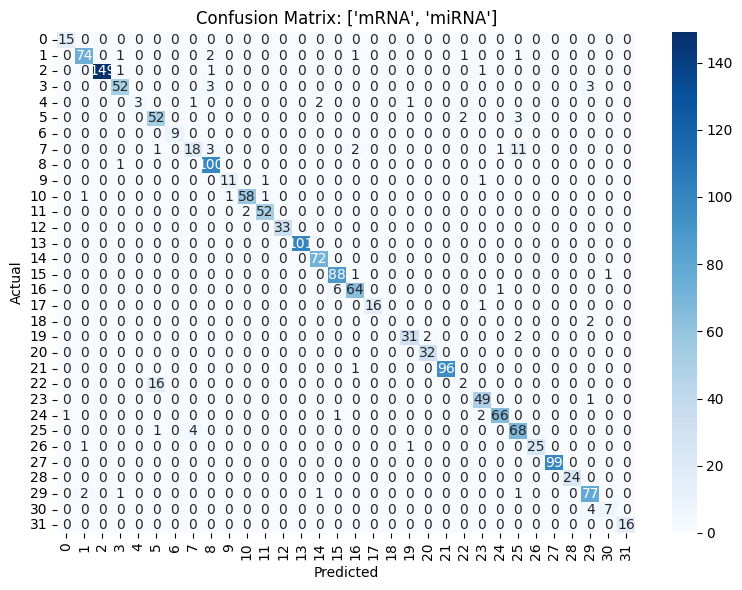

Evaulation metrics for ['mRNA', 'CNV'] modality:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.89      0.85      0.87        80
           2       0.97      0.99      0.98       152
           3       0.86      0.88      0.87        58
           4       0.67      0.57      0.62         7
           5       0.72      0.89      0.80        57
           6       0.90      1.00      0.95         9
           7       0.79      0.31      0.44        36
           8       0.87      0.93      0.90       101
           9       0.92      0.85      0.88        13
          10       0.97      0.93      0.95        61
          11       0.96      0.96      0.96        54
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00       101
          14       0.99      0.96      0.97        72
          15       0.89      0.97      0.93        90
          16       0.81      0.8

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


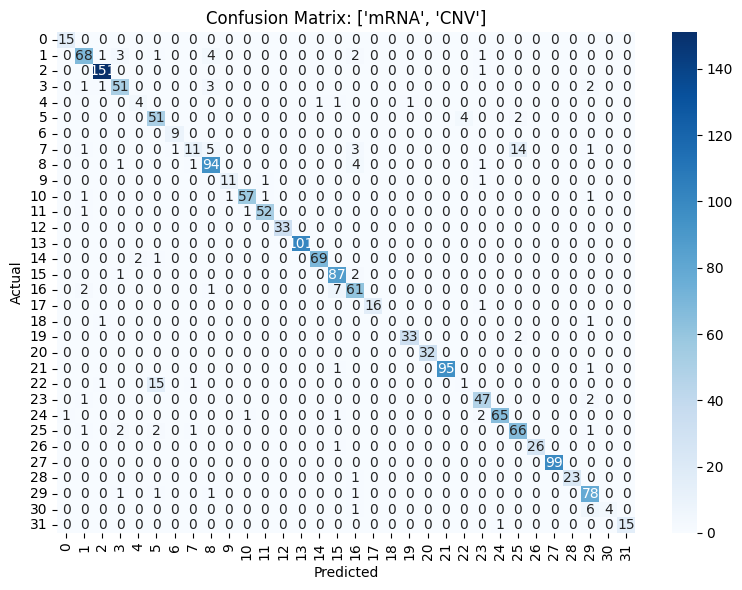

Evaulation metrics for ['mRNA', 'Methy'] modality:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.96      0.91      0.94        80
           2       1.00      1.00      1.00       152
           3       0.93      0.95      0.94        58
           4       0.75      0.43      0.55         7
           5       0.81      0.96      0.88        57
           6       0.89      0.89      0.89         9
           7       0.74      0.47      0.58        36
           8       0.92      0.97      0.94       101
           9       0.92      0.92      0.92        13
          10       0.98      0.95      0.97        61
          11       0.98      0.96      0.97        54
          12       1.00      1.00      1.00        33
          13       0.99      1.00      1.00       101
          14       0.97      0.97      0.97        72
          15       0.92      0.98      0.95        90
          16       0.91      0

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


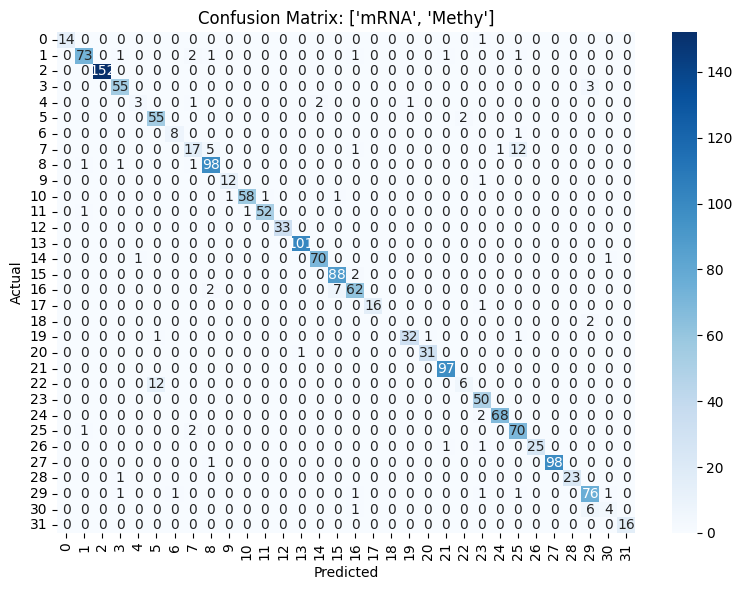

Evaulation metrics for ['miRNA', 'CNV'] modality:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.68      0.78      0.73        80
           2       0.80      0.92      0.86       152
           3       0.75      0.62      0.68        58
           4       0.80      0.57      0.67         7
           5       0.72      0.81      0.76        57
           6       0.90      1.00      0.95         9
           7       0.50      0.28      0.36        36
           8       0.79      0.79      0.79       101
           9       1.00      0.77      0.87        13
          10       0.93      0.93      0.93        61
          11       0.88      0.93      0.90        54
          12       0.97      0.94      0.95        33
          13       0.99      0.98      0.99       101
          14       0.94      0.88      0.91        72
          15       0.78      0.84      0.81        90
          16       0.63      0.

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


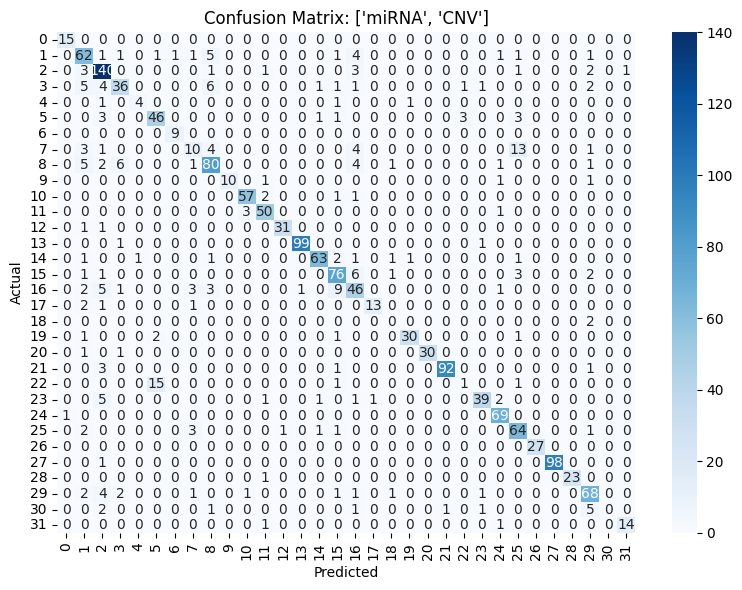

Evaulation metrics for ['miRNA', 'Methy'] modality:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      0.86      0.93        80
           2       0.99      0.99      0.99       152
           3       0.89      0.88      0.89        58
           4       0.67      0.29      0.40         7
           5       0.83      0.96      0.89        57
           6       0.90      1.00      0.95         9
           7       0.61      0.39      0.47        36
           8       0.82      0.95      0.88       101
           9       0.92      0.92      0.92        13
          10       0.98      0.92      0.95        61
          11       0.94      0.93      0.93        54
          12       1.00      1.00      1.00        33
          13       0.99      1.00      1.00       101
          14       0.92      0.96      0.94        72
          15       0.89      0.94      0.92        90
          16       0.84      

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


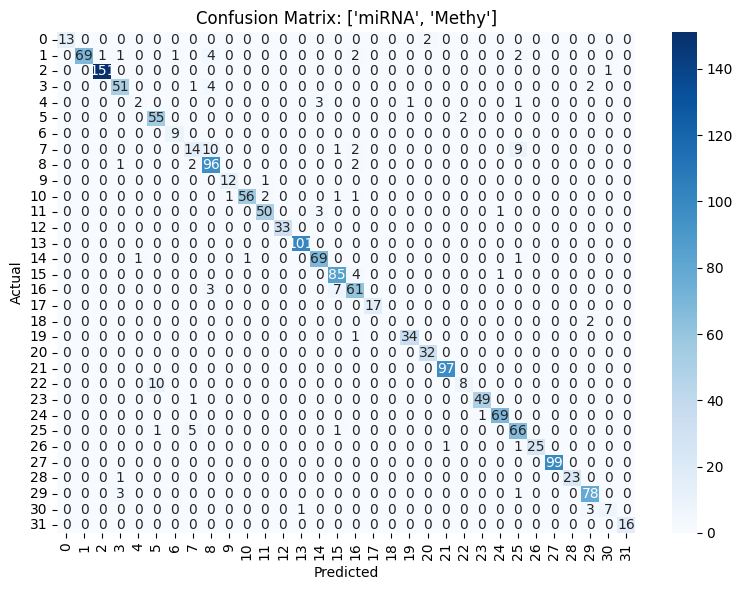

Evaulation metrics for ['CNV', 'Methy'] modality:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.94      0.80      0.86        80
           2       0.94      0.98      0.96       152
           3       0.89      0.83      0.86        58
           4       0.75      0.43      0.55         7
           5       0.80      0.93      0.86        57
           6       0.90      1.00      0.95         9
           7       0.55      0.17      0.26        36
           8       0.75      0.90      0.82       101
           9       0.92      0.92      0.92        13
          10       0.98      0.93      0.96        61
          11       0.96      0.94      0.95        54
          12       1.00      0.97      0.98        33
          13       1.00      0.99      1.00       101
          14       0.95      0.96      0.95        72
          15       0.88      0.94      0.91        90
          16       0.74      0.

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


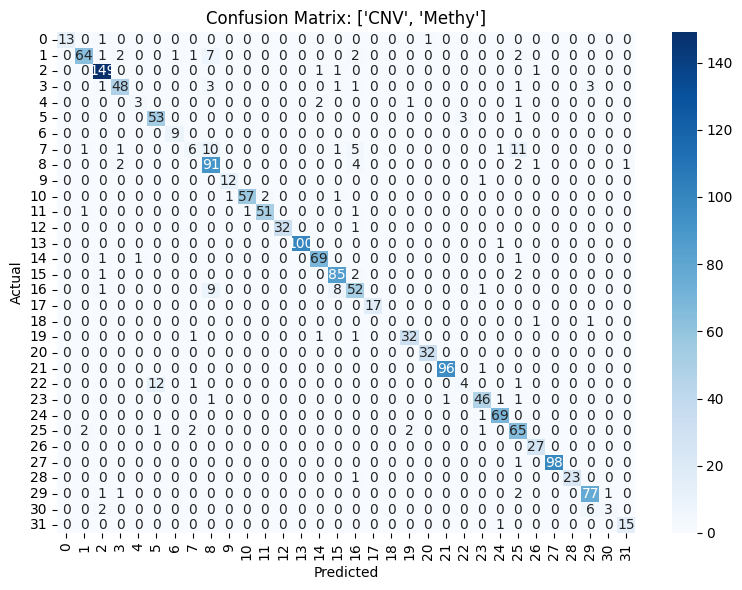

In [14]:
for i in range(len(ls) - 1):
    for j in range(i + 1, len(ls)):
        ls1 = [ls[i], ls[j]]
        X, y = fuse_modalities(ls1)
        model_training_and_evaluation(X, y, ls1)

Evaulation metrics for ['mRNA', 'miRNA', 'CNV'] modality:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.93      0.81      0.87        80
           2       0.98      0.99      0.98       152
           3       0.85      0.88      0.86        58
           4       0.80      0.57      0.67         7
           5       0.74      0.95      0.83        57
           6       0.88      0.78      0.82         9
           7       0.68      0.36      0.47        36
           8       0.90      0.94      0.92       101
           9       0.92      0.92      0.92        13
          10       0.98      0.92      0.95        61
          11       0.96      0.96      0.96        54
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00       101
          14       0.99      0.99      0.99        72
          15       0.87      0.97      0.92        90
          16       0.79

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


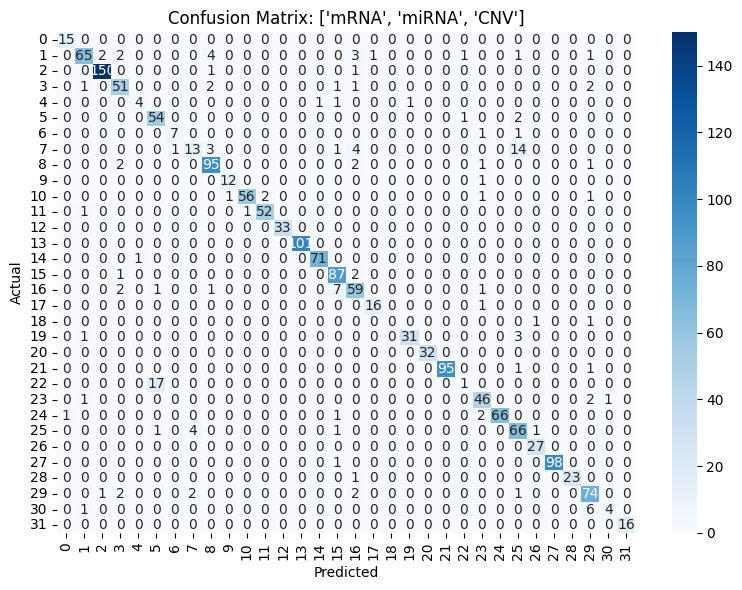

Evaulation metrics for ['mRNA', 'miRNA', 'Methy'] modality:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      0.90      0.94        80
           2       1.00      1.00      1.00       152
           3       0.96      0.93      0.95        58
           4       0.75      0.43      0.55         7
           5       0.84      0.91      0.87        57
           6       0.89      0.89      0.89         9
           7       0.84      0.58      0.69        36
           8       0.95      0.98      0.97       101
           9       0.92      0.92      0.92        13
          10       0.98      0.93      0.96        61
          11       0.96      0.98      0.97        54
          12       1.00      0.97      0.98        33
          13       0.99      1.00      1.00       101
          14       0.97      0.97      0.97        72
          15       0.92      0.99      0.95        90
          16       0.

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


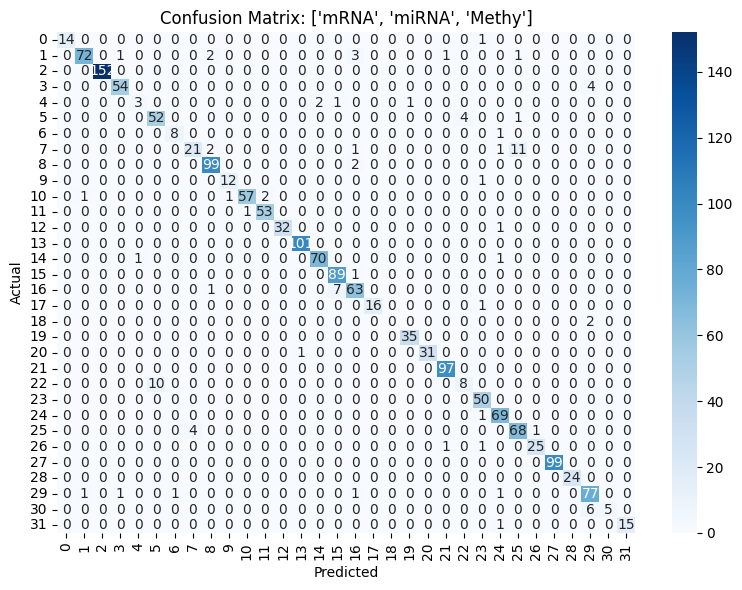

Evaulation metrics for ['mRNA', 'CNV', 'Methy'] modality:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.95      0.89      0.92        80
           2       0.94      0.99      0.96       152
           3       0.91      0.90      0.90        58
           4       0.62      0.71      0.67         7
           5       0.76      0.88      0.81        57
           6       1.00      1.00      1.00         9
           7       0.72      0.36      0.48        36
           8       0.84      0.94      0.89       101
           9       0.92      0.92      0.92        13
          10       0.97      0.93      0.95        61
          11       0.96      0.94      0.95        54
          12       1.00      1.00      1.00        33
          13       1.00      0.99      1.00       101
          14       0.99      0.94      0.96        72
          15       0.91      0.96      0.93        90
          16       0.82

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


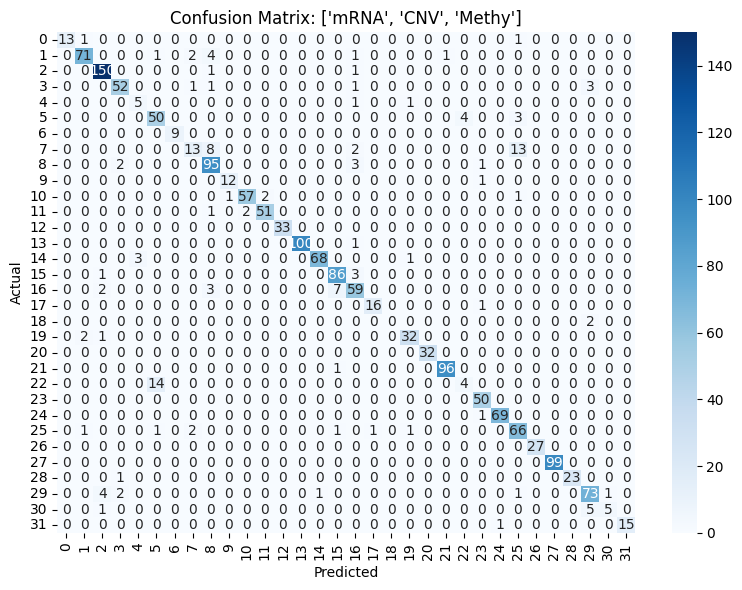

Evaulation metrics for ['miRNA', 'CNV', 'Methy'] modality:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.76      0.84        80
           2       0.95      0.97      0.96       152
           3       0.79      0.84      0.82        58
           4       0.75      0.43      0.55         7
           5       0.75      0.95      0.84        57
           6       0.90      1.00      0.95         9
           7       0.50      0.22      0.31        36
           8       0.78      0.91      0.84       101
           9       0.92      0.92      0.92        13
          10       0.97      0.92      0.94        61
          11       0.95      0.96      0.95        54
          12       1.00      1.00      1.00        33
          13       0.99      0.99      0.99       101
          14       0.95      0.96      0.95        72
          15       0.91      0.93      0.92        90
          16       0.8

C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


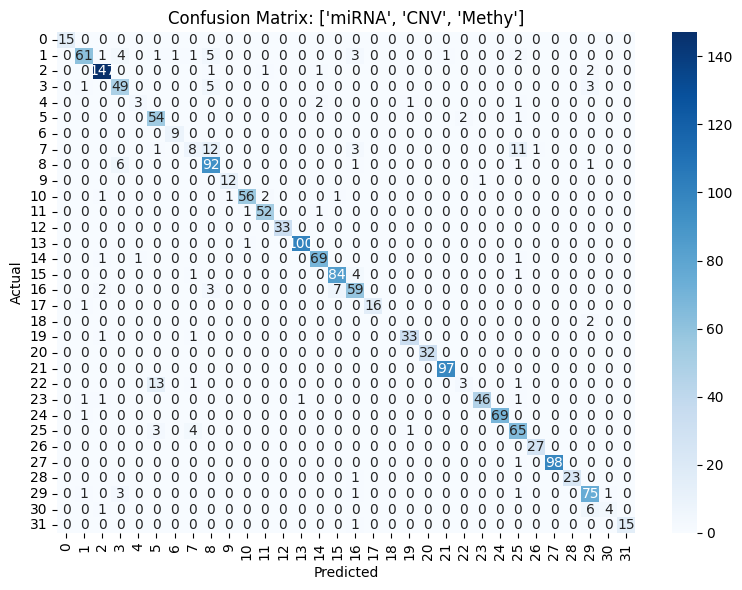

In [16]:
for i in range(len(ls) - 2):
    for j in range(i + 1, len(ls) - 1):
        for k in range(j + 1, len(ls)):
            ls1 = [ls[i], ls[j], ls[k]]
            X, y = fuse_modalities(ls1)
            model_training_and_evaluation(X, y, ls1)

Evaulation metrics for ['mRNA', 'miRNA', 'CNV', 'Methy'] modality:


C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anjana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      0.86      0.91        80
           2       0.96      0.98      0.97       152
           3       0.87      0.91      0.89        58
           4       0.67      0.57      0.62         7
           5       0.77      0.93      0.84        57
           6       1.00      1.00      1.00         9
           7       0.68      0.36      0.47        36
           8       0.85      0.93      0.89       101
           9       0.92      0.92      0.92        13
          10       0.97      0.95      0.96        61
          11       0.98      0.94      0.96        54
          12       1.00      0.97      0.98        33
          13       1.00      1.00      1.00       101
          14       0.97      0.97      0.97        72
          15       0.88      0.97      0.92        90
          16       0.80      0.85      0.82        71
          17       0.94    

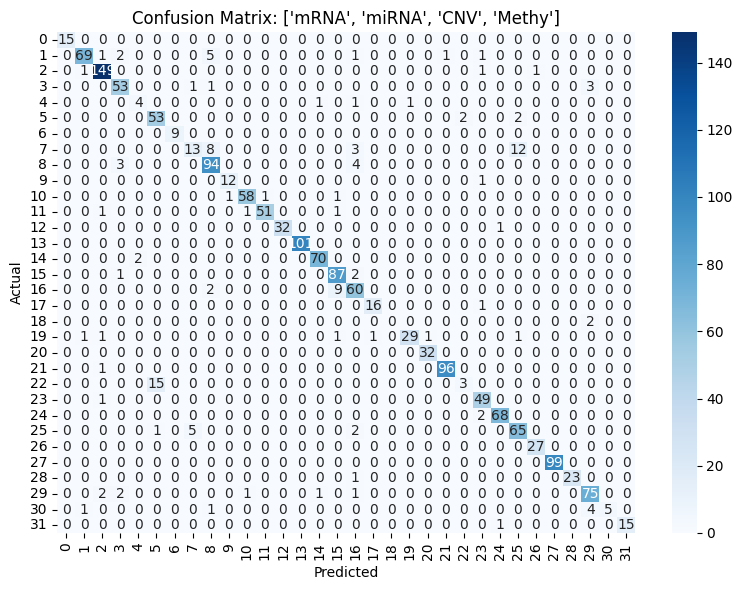

In [52]:
X, y = fuse_modalities(ls)
model_training_and_evaluation(X, y, ls)

### Discussion (15 pts)

After completing experiments, answer:

1.  **Pros & Cons of Fusion**:
    -   When does multi-omics fusion help classification?
    -   When might fusion hurt performance?
2.  **Interpretability vs. Performance**:
    -   How does fusion affect the ability to interpret biological
        signals?
    -   Are some modalities more informative than others?

* Pros of Fusion:
  1. Multi-omics fusion combines complementary biological information which allows models to learn complex relationships in the data.
  2. Fusion can provide all the values as it can remove the missing values in one modality to improve the model's accuracy.
* Cons of Fusion:
  1. Fusion can increase the feature dimensionality which might lead to model overfitting.
  2. Noise values can be present if two modalities are not properly aligned which leads to redudant samples reducing the model's performance.
* When does multi-omics fusion help classification?
  1. Multi-omics fusion can help classification when the modalities provide complementary, non-redundant information about the same disease.
  2. This could also be helpful if the samples are aligned and the standardization and normalization is consistent across all the modalities.
* When might fusion hurt performance?
  1. Fusion might hurt performance if an omics dataset contains noise or missing values which adds these inconsistencies to other modalities.
  2. The issues also exist if the omics datasets differ in their scales and need different standardization and normalization techniques. Fusion can also increase the feature dimensionality which could lead to model overfitting.
* How does fusion affect the ability to interpret biological signals?
  1. Fusion can improve the model's performance but makes it difficult to track which modality or feature is important in obtaining the output.
  2. Single-omics models are more interpretable as they provide clear insights about which features are important in obtaining the output.
* Are some modalities more informative than others?
  1. mRNA data can be more informative as it directly provides information about the cellular activity and phenotype.
  2. DNA Methylation data adds context and improves the model's accuracy when fused with mRNA data.
  3. miRNA and CNV data can add context when fused with other modalities but the model's accuracy is low when trained on these individually.